Feature Matrix Sparsity: 0.0000


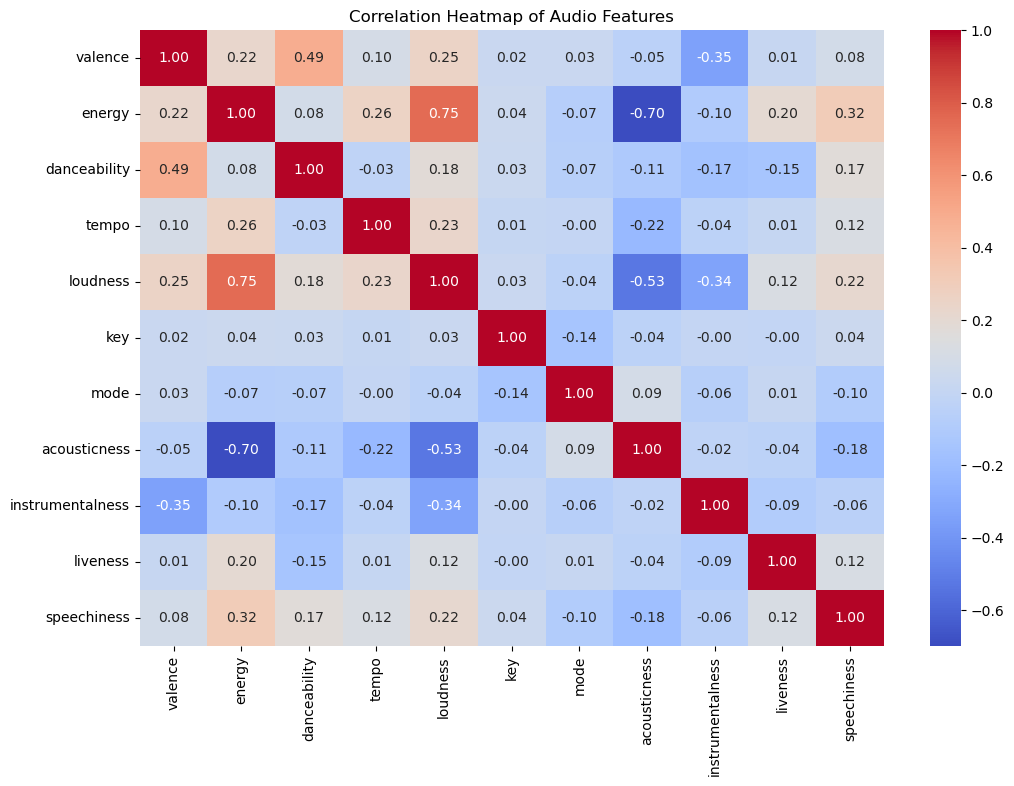

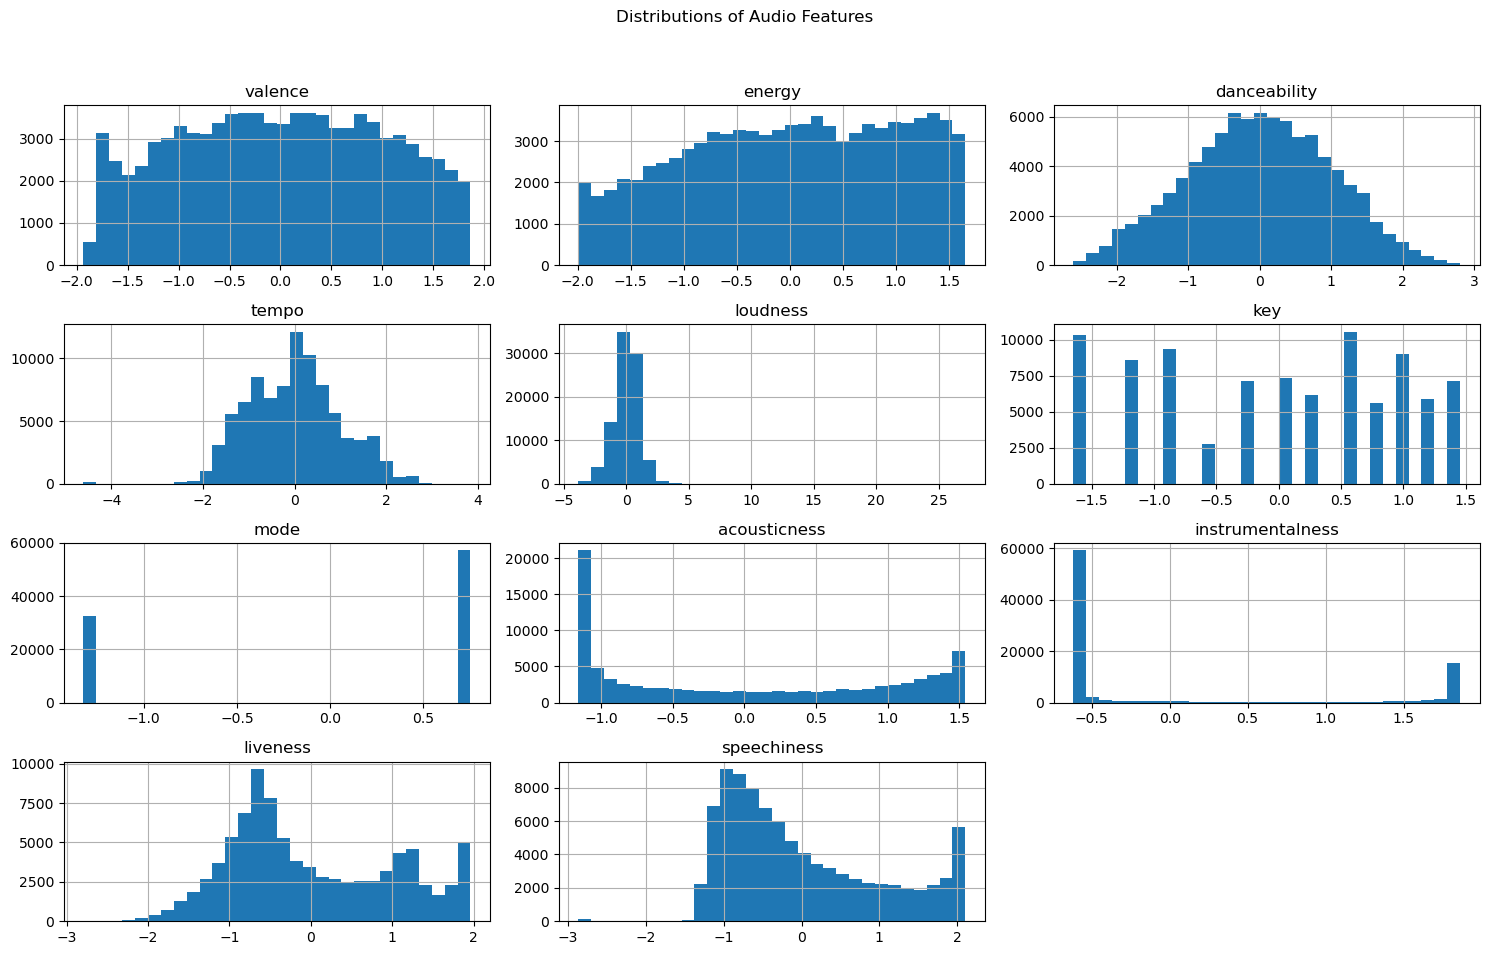

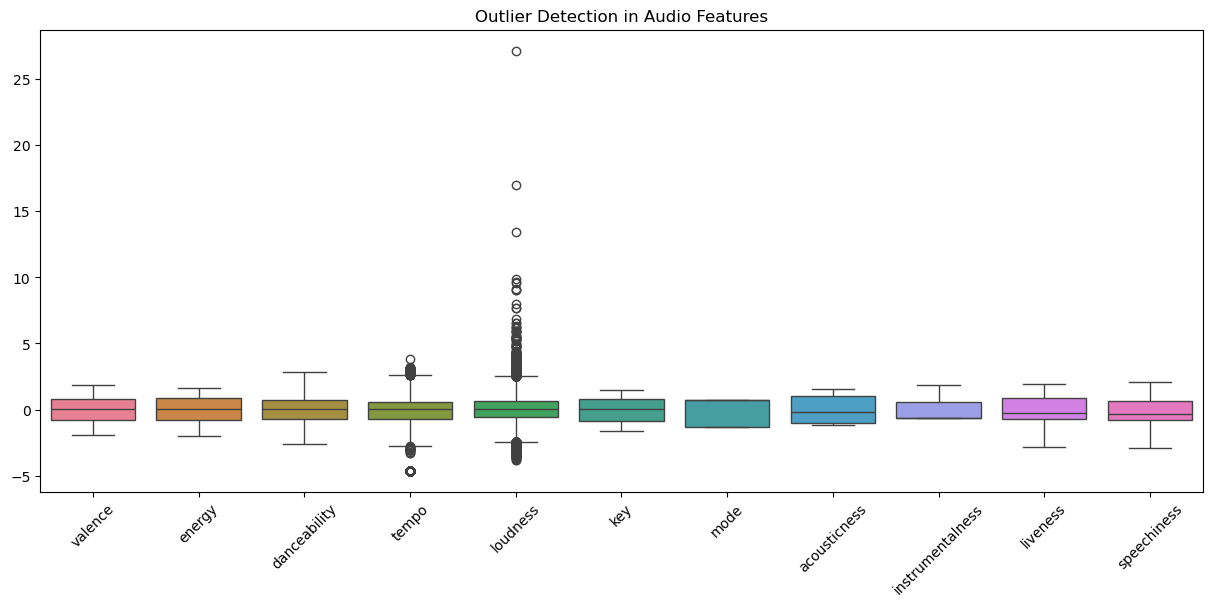

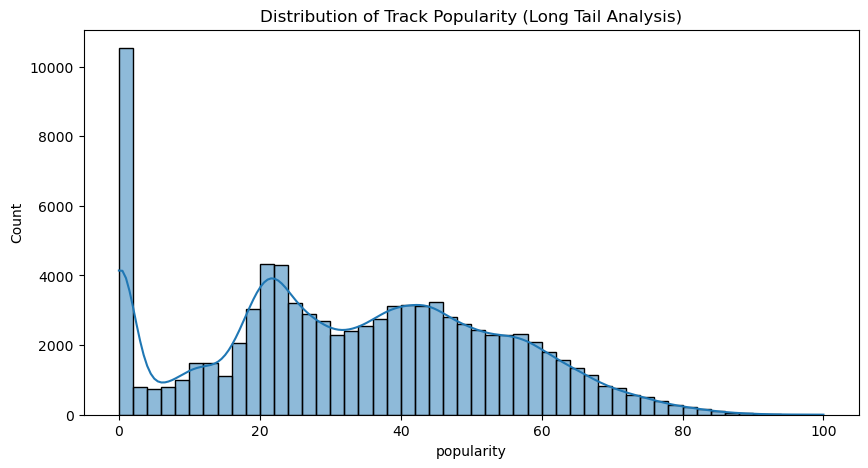

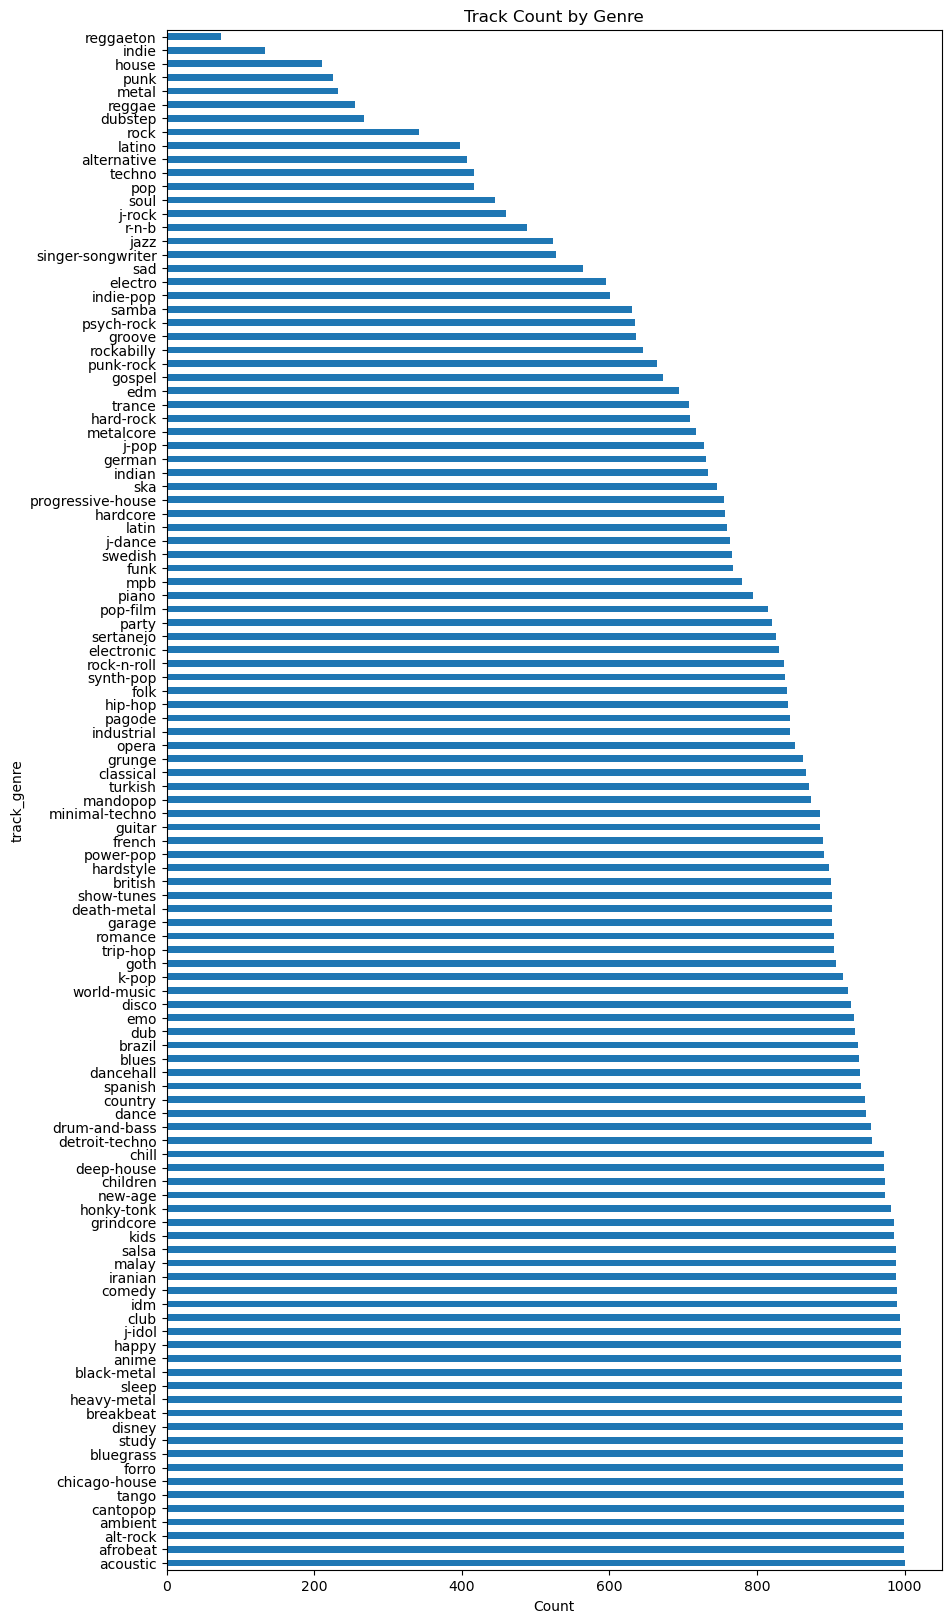


EDA Summary:
Total Unique Tracks: 89740
Features Prepped for Autoencoder: ['valence', 'energy', 'danceability', 'tempo', 'loudness', 'key', 'mode', 'acousticness', 'instrumentalness', 'liveness', 'speechiness']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, PowerTransformer

# ===========================================================
# 1. DATA WRANGLING
# ===========================================================

# Load the Spotify Tracks Dataset
# Standardizing the variable name for consistent use throughout the project
df_spotify = pd.read_csv('dataset.csv')

# Drop the redundant index column if present (often found in Kaggle exports)
if 'Unnamed: 0' in df_spotify.columns:
    df_spotify.drop(columns=['Unnamed: 0'], inplace=True)

# Data Cleaning: Handling missing values and duplicates
df_spotify.dropna(inplace=True)
df_spotify.drop_duplicates(subset=['track_id'], inplace=True)

# Defining feature sets based on Capstone 3 Proposal [cite: 9, 10, 11]
mood_features = ['valence', 'energy', 'danceability']
prop_features = ['tempo', 'loudness', 'key', 'mode']
context_features = ['acousticness', 'instrumentalness', 'liveness', 'speechiness']
audio_features = mood_features + prop_features + context_features

# Specialized Wrangling: Handling varying scales 
# Implementing PowerTransformer to handle non-normal distributions (e.g., loudness)
pt = PowerTransformer(method='yeo-johnson')
df_spotify[audio_features] = pt.fit_transform(df_spotify[audio_features])

# Calculate Sparsity (Requirement for Recommendation Systems )
# In content-based filtering, we check for feature density
sparsity = 1.0 - (np.count_nonzero(df_spotify[audio_features]) / df_spotify[audio_features].size)
print(f"Feature Matrix Sparsity: {sparsity:.4f}")

# ===========================================================
# 2. EXPLORATORY DATA ANALYSIS (EDA)
# ===========================================================

# Relationship Investigation: Correlation Heatmap [cite: 50]
# Goal: Identify collinear features or relationships between audio attributes [cite: 44]
plt.figure(figsize=(12, 8))
sns.heatmap(df_spotify[audio_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Audio Features')
plt.show()

# Distribution Analysis: Histograms [cite: 48]
# Goal: Evaluate the distribution of key features after transformation [cite: 43]
df_spotify[audio_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distributions of Audio Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Identifying Outliers: Box Plots 
# Goal: Check for sonic outliers that might skew the Autoencoder's latent space [cite: 16]
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_spotify[audio_features])
plt.title('Outlier Detection in Audio Features')
plt.xticks(rotation=45)
plt.show()

# Target Variable Balance: Popularity [cite: 42]
# Checking if popularity is balanced across the "Long Tail" [cite: 3]
plt.figure(figsize=(10, 5))
sns.histplot(df_spotify['popularity'], bins=50, kde=True)
plt.title('Distribution of Track Popularity (Long Tail Analysis)')
plt.show()

# Categorical Investigation: Genre Representation [cite: 12]
# Goal: Understand how many tracks exist per genre for later Clustering Analysis [cite: 19]
plt.figure(figsize=(10, 20))
df_spotify['track_genre'].value_counts().plot(kind='barh')
plt.title('Track Count by Genre')
plt.xlabel('Count')
plt.show()

# ===========================================================
# 3. SUMMARY FOR NEXT STEPS (MODELING)
# ===========================================================
print("\nEDA Summary:")
print(f"Total Unique Tracks: {df_spotify.shape[0]}")
print(f"Features Prepped for Autoencoder: {audio_features}")